In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

att = pd.read_csv('data/Student_Attendance.csv')
growth = pd.read_csv('data/Student_Growth.csv')
dropout = pd.read_csv('data/Student_Dropout.csv')


In [33]:
att.info()
att.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742540 entries, 0 to 742539
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   School Year                   742540 non-null  int64  
 1   District Code                 742540 non-null  int64  
 2   District                      742540 non-null  object 
 3   School Code                   742540 non-null  int64  
 4   Organization                  742540 non-null  object 
 5   Race                          742540 non-null  object 
 6   Gender                        742540 non-null  object 
 7   Grade                         742540 non-null  object 
 8   SpecialDemo                   742540 non-null  object 
 9   Geography                     742540 non-null  object 
 10  SubGroup                      742540 non-null  object 
 11  Rowstatus                     742540 non-null  object 
 12  StudentsChronicallyAbsent     371498 non-nul

,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,Rowstatus,StudentsChronicallyAbsent,Students,PctStudentsChronicallyAbsent,AvgDaysEnrolled,AvgDaysAbsent
0,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,1st Grade,All Students,All Students,Hispanic/Latino/1st Grade,REPORTED,252.0,2125.0,11.86,153.871353,7.427498
1,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,2nd Grade,All Students,All Students,Hispanic/Latino/2nd Grade,REPORTED,216.0,1898.0,11.38,153.746528,6.742560
2,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,3rd Grade,All Students,All Students,Hispanic/Latino/3rd Grade,REPORTED,170.0,1892.0,8.99,156.281407,6.259296
3,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,4th Grade,All Students,All Students,Hispanic/Latino/4th Grade,REPORTED,149.0,1837.0,8.11,156.608605,6.188699
4,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,5th Grade,All Students,All Students,Hispanic/Latino/5th Grade,REPORTED,153.0,1655.0,9.24,157.186303,6.446895
5,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,6th Grade,All Students,All Students,Hispanic/Latino/6th Grade,REPORTED,201.0,1738.0,11.57,157.121711,7.597588
6,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,7th Grade,All Students,All Students,Hispanic/Latino/7th Grade,REPORTED,224.0,1593.0,14.06,157.295468,8.201208
7,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,8th Grade,All Students,All Students,Hispanic/Latino/8th Grade,REPORTED,236.0,1386.0,17.03,157.481969,8.938974
8,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,9th Grade,All Students,All Students,Hispanic/Latino/9th Grade,REPORTED,492.0,1763.0,27.91,149.904634,12.963901
9,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,10th Grade,All Students,All Students,Hispanic/Latino/10th Grade,REPORTED,336.0,1444.0,23.27,157.709569,11.609838


In [217]:
unique = att["Race"].unique().tolist()
print(unique)

# Only looking at entire state
att_state = att[ (att["District Code"] == 0)]

# Rename to be concise
att_state = att_state.replace('Native Hawaiian/Pacific Islander', 'Hawaiian/Pacific Islander' )

# Cut from 2015-2019, 2020 seems to be redacted / no data for now
att_state =  att_state[att_state['Rowstatus'] != 'REDACTED']

#overall only separate by race for now
att_state_all = att_state[(att_state['Grade'] == 'All Students') &
                      (att_state['Gender'] == 'All Students') &
                      (att_state['SpecialDemo'] == 'All Students') &
                      (att_state_all['SubGroup'] != 'All Students')]

#att_state_all = att_state_all.sort_values('PctStudentsChronicallyAbsent')

att_state_all

#att_state_all = att_state_all.set_index('SubGroup')
#ax = att_state_all[att_state_all['School Year'] == 2015].plot.bar(y='PctStudentsChronicallyAbsent', rot=90)

['Hispanic/Latino', 'All Students', 'White', 'Native American', 'African American', 'Asian American', 'Multi-Racial', 'Native Hawaiian/Pacific Islander']


,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,Rowstatus,StudentsChronicallyAbsent,Students,PctStudentsChronicallyAbsent,AvgDaysEnrolled,AvgDaysAbsent
12,2015,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,All Students,All Students,All Students,Hispanic/Latino,REPORTED,3414.0,21920.0,15.57,155.496565,8.703340
327,2015,0,State of Delaware,0,State of Delaware,Native American,All Students,All Students,All Students,All Students,Native American,REPORTED,107.0,577.0,18.54,157.167230,9.878378
566,2015,0,State of Delaware,0,State of Delaware,African American,All Students,All Students,All Students,All Students,African American,REPORTED,8462.0,44747.0,18.91,153.381503,9.189935
895,2015,0,State of Delaware,0,State of Delaware,White,All Students,All Students,All Students,All Students,White,REPORTED,8927.0,65198.0,13.69,161.483502,8.661167
1224,2015,0,State of Delaware,0,State of Delaware,Asian American,All Students,All Students,All Students,All Students,Asian,REPORTED,388.0,5217.0,7.44,158.321772,6.045994
1490,2015,0,State of Delaware,0,State of Delaware,Hawaiian/Pacific Islander,All Students,All Students,All Students,All Students,Hawaiian/Pacific Islander,REPORTED,18.0,164.0,10.98,162.090361,8.192771
1668,2015,0,State of Delaware,0,State of Delaware,Multi-Racial,All Students,All Students,All Students,All Students,Multi-Racial,REPORTED,662.0,4048.0,16.35,153.955061,8.614948
117834,2016,0,State of Delaware,0,State of Delaware,Hispanic/Latino,All Students,All Students,All Students,All Students,Hispanic/Latino,REPORTED,3665.0,23272.0,15.75,158.347518,9.049728
118156,2016,0,State of Delaware,0,State of Delaware,Native American,All Students,All Students,All Students,All Students,Native American,REPORTED,100.0,559.0,17.89,158.429072,9.805604
118397,2016,0,State of Delaware,0,State of Delaware,African American,All Students,All Students,All Students,All Students,African American,REPORTED,8736.0,44655.0,19.56,154.887579,9.602828


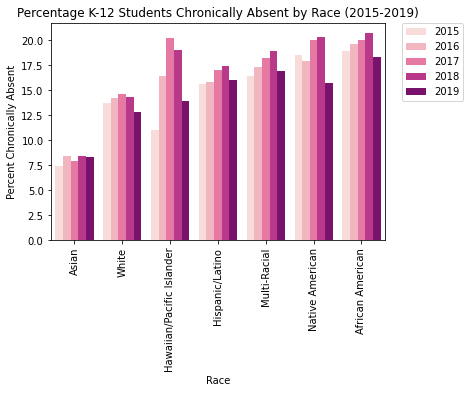

In [475]:

plotOrder = ['Asian', 'White', 'Hawaiian/Pacific Islander', 'Hispanic/Latino','Multi-Racial', 'Native American','African American']

att_plot = sns.barplot(x = 'SubGroup',
                        y = 'PctStudentsChronicallyAbsent',
                        data = att_state_all,
                       hue = 'School Year',
                       palette = "RdPu",
                       order = plotOrder
                      )
                       
for item in att_plot.get_xticklabels(): item.set_rotation(90)
att_plot.set(xlabel='Race', ylabel="Percent Chronically Absent", title="Percentage K-12 Students Chronically Absent by Race (2015-2019)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

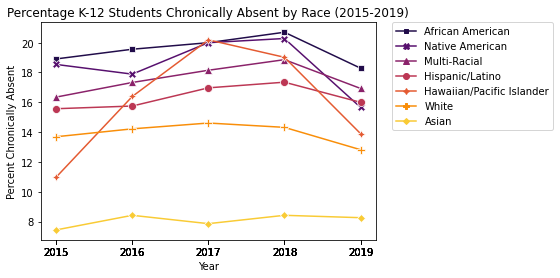

In [474]:
plotOrderReversed = plotOrder[::-1]

att_plot = sns.lineplot(x = 'School Year',
                        y = 'PctStudentsChronicallyAbsent',
                        data = att_state_all,
                        hue = 'SubGroup',
                        style = 'SubGroup',
                        markers = True,
                        dashes = False,
                        markersize = 8,
                        hue_order = plotOrderReversed,
                        palette = 'inferno'
                      )


att_plot.set_xticks(att_state_all['School Year'].values)
att_plot.set(xlabel='Year', ylabel="Percent Chronically Absent", title="Percentage K-12 Students Chronically Absent by Race (2015-2019)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

### Observations
* Some of the higher chronically absent percentages drop quite a bit from 2018 to 2019
* The hawaiian/pacific islander percentages are really strange, doesn't follow other trends
    * Could be fluctuation due to low numbers?
    * Maybe error in data collection?
    * Look into later
* Across the years, none of the lines have really crossed each other except whatever is happening with hawaiian/pacific islander and one dip for native american students in 2019
    * African American students consistently have the highest percentage of chronic absence
    * Asians and Whites consistently have the lowest percentage of chronic absences
* Mind that other factors besides inequality may affect these rates
    * Such as cultural emphasis on education 
    * Possible changes or hiccups in data collection
    

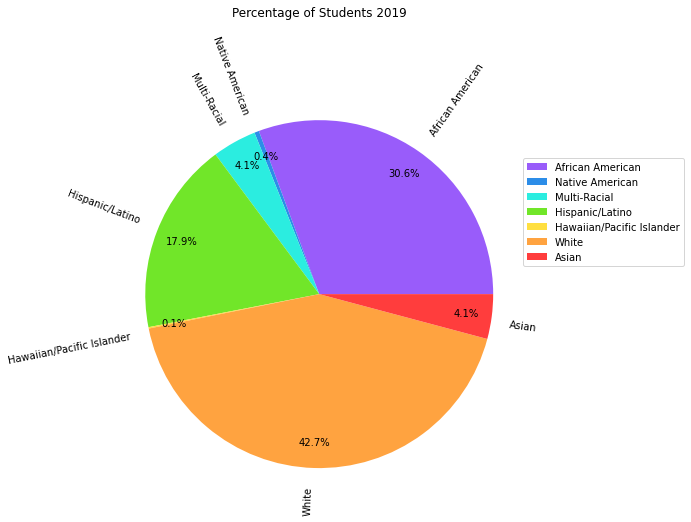

In [470]:
pie_df = att_state_all[['SubGroup','Students','School Year']]
pie_df = pie_df.set_index('SubGroup')
pie_colors = ['#995cfa','#2c8de8','#2bede0',  '#71e629', '#ffdf40','#ffa340','#ff3d3d']

att_pie_2019 = pie_df[pie_df['School Year'] == 2019].reindex(plotOrderReversed).plot.pie( 
    y='Students', 
    figsize=(5, 5),
    labels = plotOrderReversed,
    autopct='%1.1f%%',
    pctdistance=.85,
    radius = 1.6,
    rotatelabels = True,
    ylabel = '',
    colors = pie_colors
)
plt.title("Percentage of Students 2019", y=1.5)
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0)
plt.show()

### Note
* Very small percentage of hawaiian/pacific islander students - .1%
* Second smallest is native american students - .4%